# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab, you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate the model performance

## Import necessary libraries

Let's first import the libraries you'll need for this lab. 

In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('ggplot')
from sklearn.metrics import roc_auc_score


## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and preprocessed for you so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [4]:
# Import the data
df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [7]:
# Create X and y 
y = df['Survived']
X = df.drop(columns=['Survived','PassengerId'],axis=1)

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [8]:
# Train the classifier using training data
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=1)

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance

In [11]:
# Make predictions using test set 
y_pred = dt.predict_proba(X_test)[:, 1]

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7348962773515203

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results 

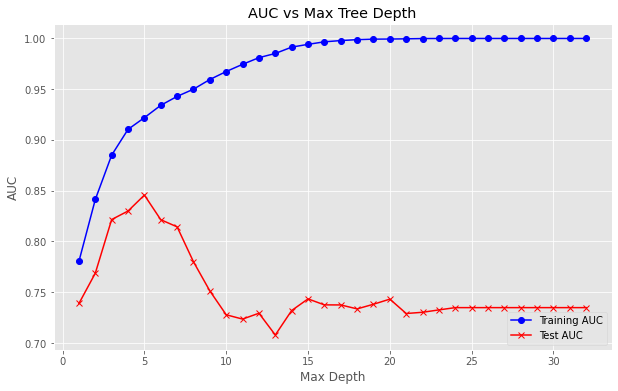

In [14]:
# Identify the optimal tree depth for given data
max_depth_range = np.arange(1, 33)

# Initialize lists to store training and test AUC scores
train_auc = []
test_auc = []

# Loop over each depth value
for depth in max_depth_range:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=SEED)
    dt.fit(X_train, y_train)
    
    train_proba = dt.predict_proba(X_train)[:, 1]
    test_proba = dt.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC for both training and test sets
    train_auc.append(roc_auc_score(y_train, train_proba))
    test_auc.append(roc_auc_score(y_test, test_proba))

# Plotting the AUC values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_auc, label='Training AUC', color='blue', linestyle='-', marker='o')
plt.plot(max_depth_range, test_auc, label='Test AUC', color='red', linestyle='-', marker='x')
plt.xlabel('Max Depth')
plt.ylabel('AUC')
plt.title('AUC vs Max Tree Depth')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [15]:
# Your observations here 
"""
Observations:
Underfitting: At lower depths, the model may underfit, resulting in lower AUC scores for both training and test sets.
Overfitting: At higher depths, the model may start to overfit, leading to a high training AUC but a much lower test AUC.
Optimal Depth: The optimal depth is usually where the test AUC is maximized and close to the training AUC. 
This indicates good generalization without overfitting.
Interpretation:
If you observe a sharp increase in AUC up to a certain depth and then a plateau or decline, this suggests the optimal depth is at the point just before the test AUC starts to decrease significantly.
An ideal model should have a high test AUC that is close to the training AUC, indicating the model is neither overfitting nor underfitting.
"""

'\nObservations:\nUnderfitting: At lower depths, the model may underfit, resulting in lower AUC scores for both training and test sets.\nOverfitting: At higher depths, the model may start to overfit, leading to a high training AUC but a much lower test AUC.\nOptimal Depth: The optimal depth is usually where the test AUC is maximized and close to the training AUC. \nThis indicates good generalization without overfitting.\nInterpretation:\nIf you observe a sharp increase in AUC up to a certain depth and then a plateau or decline, this suggests the optimal depth is at the point just before the test AUC starts to decrease significantly.\nAn ideal model should have a high test AUC that is close to the training AUC, indicating the model is neither overfitting nor underfitting.\n'

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

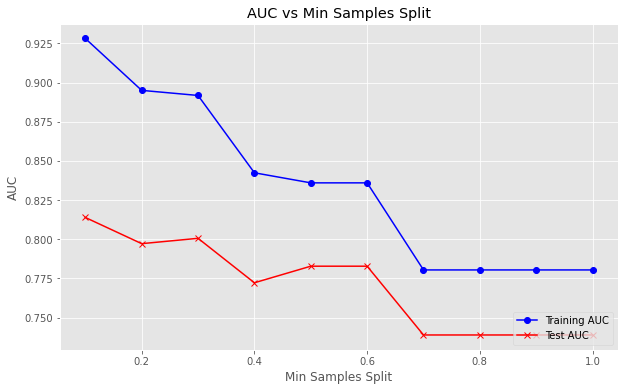

In [16]:
# Identify the optimal min-samples-split for given data
min_samples_split_range = np.arange(0.1, 1.1, 0.1)

# Initialize lists to store training and test AUC scores
train_auc = []
test_auc = []

# Loop over each min_samples_split value
for min_samples in min_samples_split_range:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples, random_state=SEED)
    dt.fit(X_train, y_train)
    
    # Get predicted probabilities for the training and test sets
    train_proba = dt.predict_proba(X_train)[:, 1]
    test_proba = dt.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC for both training and test sets
    train_auc.append(roc_auc_score(y_train, train_proba))
    test_auc.append(roc_auc_score(y_test, test_proba))

# Plotting the AUC values
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_range, train_auc, label='Training AUC', color='blue', linestyle='-', marker='o')
plt.plot(min_samples_split_range, test_auc, label='Test AUC', color='red', linestyle='-', marker='x')
plt.xlabel('Min Samples Split')
plt.ylabel('AUC')
plt.title('AUC vs Min Samples Split')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Your observations here
"""
Observations:
Underfitting: If min_samples_split is very small, the tree might overfit, leading to high training AUC and low test AUC.
Overfitting: As the min_samples_split increases, the tree becomes more conservative, which might result in underfitting if the value is too large.
Optimal Value: The optimal value is where the test AUC is maximized while being close to the training AUC, showing the model generalizes well.
Interpretation:
Low min_samples_split values: The tree can split very early, leading to a more complex tree that might overfit the training data and have a low test AUC.
High min_samples_split values: The tree might not grow deep enough, resulting in underfitting with lower AUC values for both training and test sets.
Optimal value: Look for the point where the test AUC is high and stable while not significantly diverging from the training AUC. 
This will indicate that the tree is complex enough to capture patterns without overfitting.
"""

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

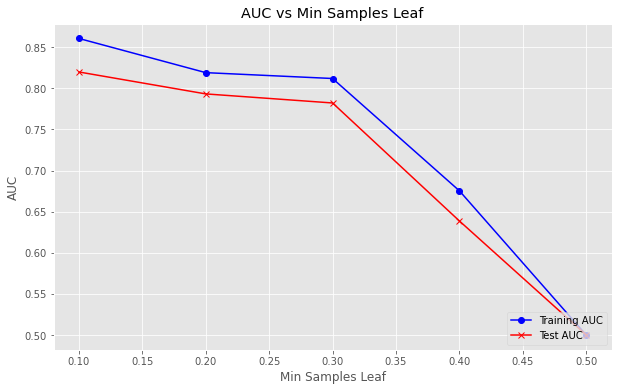

In [17]:
# Calculate the optimal value for minimum sample leafs
min_samples_leaf_range = np.arange(0.1, 0.6, 0.1)

# Initialize lists to store training and test AUC scores
train_auc = []
test_auc = []

# Loop over each min_samples_leaf value
for min_samples in min_samples_leaf_range:
    # Create and train the decision tree classifier
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples, random_state=SEED)
    dt.fit(X_train, y_train)
    
    # Get predicted probabilities for the training and test sets
    train_proba = dt.predict_proba(X_train)[:, 1]
    test_proba = dt.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC for both training and test sets
    train_auc.append(roc_auc_score(y_train, train_proba))
    test_auc.append(roc_auc_score(y_test, test_proba))

# Plotting the AUC values
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_range, train_auc, label='Training AUC', color='blue', linestyle='-', marker='o')
plt.plot(min_samples_leaf_range, test_auc, label='Test AUC', color='red', linestyle='-', marker='x')
plt.xlabel('Min Samples Leaf')
plt.ylabel('AUC')
plt.title('AUC vs Min Samples Leaf')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Your observations here 
"""
Observations:
Underfitting: If min_samples_leaf is too large (for example, close to 0.5), the model may not be able to learn the necessary details, resulting in a low AUC for both the training and test sets.
Overfitting: If min_samples_leaf is too small (close to 0.1), the model might overfit, leading to a high training AUC but a low test AUC.
Optimal Value: The optimal value is where the test AUC is high and stable, and close to the training AUC, indicating good generalization.
Interpretation:
Low min_samples_leaf values: The model might overfit by having many small leaves, potentially leading to poor performance on the test set.
High min_samples_leaf values: The model may fail to capture enough complexity, leading to underfitting, where both training and test AUC values are low.
Optimal Value: Look for the min_samples_leaf value that maximizes test AUC while keeping the training AUC relatively stable. 
This suggests the model is capturing the necessary patterns in the data without overfitting.
"""

## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

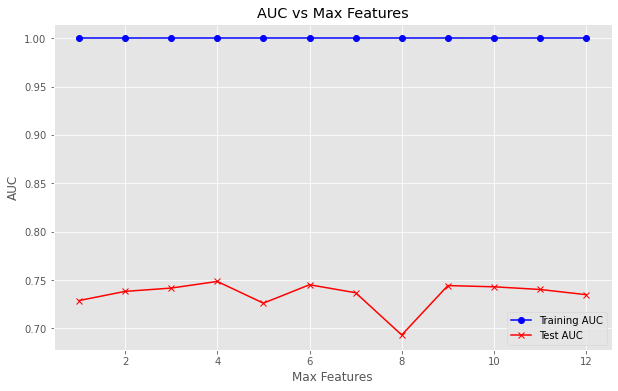

In [18]:
# Find the best value for optimal maximum feature size
max_features_range = np.arange(1, 13)

# Initialize lists to store training and test AUC scores
train_auc = []
test_auc = []

# Loop over each max_features value
for max_feat in max_features_range:
    # Create and train the decision tree classifier
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feat, random_state=SEED)
    dt.fit(X_train, y_train)
    
    # Get predicted probabilities for the training and test sets
    train_proba = dt.predict_proba(X_train)[:, 1]
    test_proba = dt.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC for both training and test sets
    train_auc.append(roc_auc_score(y_train, train_proba))
    test_auc.append(roc_auc_score(y_test, test_proba))

# Plotting the AUC values
plt.figure(figsize=(10, 6))
plt.plot(max_features_range, train_auc, label='Training AUC', color='blue', linestyle='-', marker='o')
plt.plot(max_features_range, test_auc, label='Test AUC', color='red', linestyle='-', marker='x')
plt.xlabel('Max Features')
plt.ylabel('AUC')
plt.title('AUC vs Max Features')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [19]:
# Your observations here
"""
Observations:
Underfitting: If the model is using too few features (low values of max_features), it might not be capturing enough information from the data, leading to lower AUC scores for both training and test sets.
Overfitting: If the model is using all features (or close to all), it might overfit, leading to a very high training AUC but lower test AUC.
Optimal Value: The optimal value of max_features is typically where the test AUC is maximized while remaining stable. This indicates a balanced model that generalizes well.
Interpretation:
Low max_features values: The tree will have fewer features to choose from for each split, which can cause the model to underfit if it doesn't capture enough information.
High max_features values: The tree uses all or most features, potentially leading to overfitting if the model becomes too complex and is too specific to the training data.
Optimal Value: Look for the max_features value where the test AUC is highest and stable while being close to the training AUC, indicating good generalization and avoiding overfitting.
"""

"\nObservations:\nUnderfitting: If the model is using too few features (low values of max_features), it might not be capturing enough information from the data, leading to lower AUC scores for both training and test sets.\nOverfitting: If the model is using all features (or close to all), it might overfit, leading to a very high training AUC but lower test AUC.\nOptimal Value: The optimal value of max_features is typically where the test AUC is maximized while remaining stable. This indicates a balanced model that generalizes well.\nInterpretation:\nLow max_features values: The tree will have fewer features to choose from for each split, which can cause the model to underfit if it doesn't capture enough information.\nHigh max_features values: The tree uses all or most features, potentially leading to overfitting if the model becomes too complex and is too specific to the training data.\nOptimal Value: Look for the max_features value where the test AUC is highest and stable while being 

## Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance. 

- Train the classifier with the optimal values identified 
- Compare the AUC of the new model with the earlier vanilla decision tree AUC 
- Interpret the results of the comparison

In [22]:
# Train a classifier with optimal values identified above
optimal_max_depth = 5  
optimal_min_samples_split = 0.2 
optimal_min_samples_leaf = 0.2  
optimal_max_features = 0.74 

dt = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=optimal_max_depth, 
    min_samples_split=optimal_min_samples_split, 
    min_samples_leaf=optimal_min_samples_leaf, 
    max_features=optimal_max_features, 
    random_state=SEED
)

false_positive_rate, true_positive_rate, thresholds =  roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.7348962773515203

In [23]:
# Your observations here

In order to address the issue of a baseline classifier performing better than a tuned one like this, a more-sophisticated technique is called a "grid search" and this will be introduced in a future lesson.

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 